In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
data_preprocessed = pd.read_excel (r'data_preprocessed.xlsx')
data_preprocessed

,Tasa de Letalidad,Población,Densidad,Índice Corrup.,Emis.CO2 p.cap.,Annual_temp,AMERICA,ASIA,EUROPA,OCEANIA
0,1.308,17.431,4.043,2.773,-1.238,2.559,0,1,0,0
1,0.996,14.861,4.595,3.584,0.495,2.422,0,0,1,0
2,1.017,18.236,5.451,4.382,2.214,2.141,0,0,1,0
3,1.167,17.243,3.219,2.944,-0.020,3.069,0,0,0,0
4,0.408,17.333,2.773,3.892,2.925,3.205,0,1,0,0
5,1.223,17.559,2.890,3.555,1.371,3.117,0,0,0,0
6,0.982,17.612,2.773,3.689,1.548,2.654,1,0,0,0
7,0.556,14.901,4.605,3.555,0.678,1.852,0,0,1,0
8,1.195,17.041,1.099,4.344,2.820,3.068,0,0,0,1
9,0.376,16.002,4.663,4.331,2.099,1.822,0,0,1,0


### Voy a descartar dos outliers que seguramente me dara problemas al momento de la validación

In [3]:
data_preprocessed = data_preprocessed.drop(index=143)
data_preprocessed = data_preprocessed.drop(index=120)

# Modelo de regresión lineal multiple

## Creación del modelo

In [4]:
target = data_preprocessed['Tasa de Letalidad']
inputs = data_preprocessed.drop(['Tasa de Letalidad'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.4, random_state= 365)

y_train = y_train.replace([np.inf, -np.inf],0)
y_test = y_test.replace([np.inf, -np.inf],0)

In [5]:
reg = LinearRegression()
reg.fit(x_train,y_train)
LinearRegression()

LinearRegression()

### Voy a chequear los outputs de la regresión, y las voy a guardar en y_hat (es el nombre teórico de las predicciones).


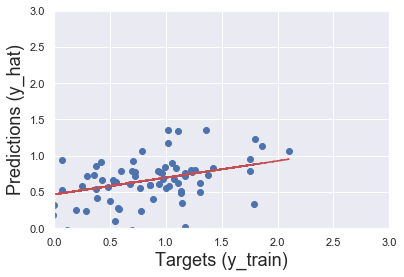

In [6]:

y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

z = np.polyfit(y_train, y_hat, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"r--")

plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

### Otra manera de chequear las predicciones es haciendo un plot de los residuos para ver si hay anomalías. En el mejor de los escenarios debería estar normalmente distribuido. En este caso vemos que hay varios valores negativos que se alegan de la media, esto nos indica que que el modelo se puede mejorar.

Text(0.5, 1.0, 'Residuals PDF')

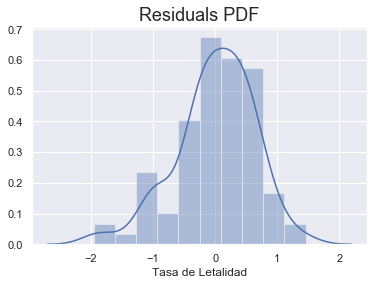

In [7]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [8]:
y_hat_test = reg.predict(x_test)

Text(0.5, 1.0, 'Residuals PDF')

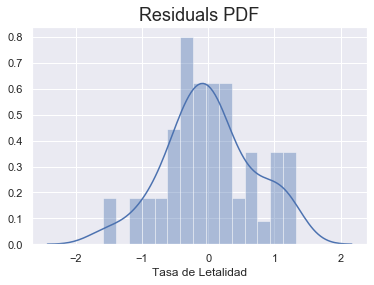

In [9]:
sns.distplot(y_test - y_hat_test, bins=15)

plt.title("Residuals PDF", size=18)

## El R2 del modelo

In [10]:
reg.score(x_train,y_train)

0.230734597056777

In [11]:
reg.score(x_test,y_test)

0.2708780250800886

### La ordenada al origen, y los coeficientes del modelo

In [12]:
reg.intercept_

-2.2434751591122275

In [13]:
reg.coef_

array([ 0.20686372, -0.12840242,  0.07124533, -0.0402673 , -0.13169261,
        0.58996639, -0.13612309,  0.4009923 , -0.27765656])

### Voy a crear un resumen para poder comparar los pesos de la regresíon

In [14]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Población,0.207
1,Densidad,-0.128
2,Índice Corrup.,0.071
3,Emis.CO2 p.cap.,-0.040
4,Annual_temp,-0.132
5,AMERICA,0.590
6,ASIA,-0.136
7,EUROPA,0.401
8,OCEANIA,-0.278


# Predicciones

### Voy a hacer un scater plot con los target del Test, y la predicciones de la data del test.

In [15]:
y_hat_test = reg.predict(x_test)

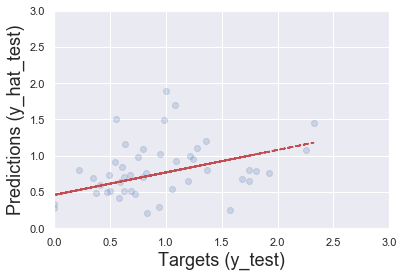

In [16]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

z = np.polyfit(y_test, y_hat_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")

plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

# Validación del modelo

### Crearé una tabla que resuma los residuos (la diferencia entre los targets y las predicciones).


In [17]:
df_tasa_letal = np.exp(y_test)
df_tasa_letal

118    2.059
32     1.244
69     1.805
43     3.606
67     9.531
133    2.555
6      2.670
83     1.415
107    2.207
57     1.638
66     0.709
116    3.368
55     3.461
96     5.717
47     1.863
27     6.815
121    4.827
97     1.830
24     1.000
8      3.303
42     1.647
117    1.734
112    1.784
137    1.883
145    2.210
20     2.949
108    2.281
44     2.728
98     1.723
90    10.215
68     1.983
4      1.503
138    0.949
40     1.000
72     1.866
11     1.458
131    0.771
123    0.248
13     5.380
81     1.627
146    2.861
132    1.000
129    1.608
74     0.600
126    6.106
26     0.172
76     2.291
49     3.895
19     0.511
139    2.110
86     3.919
113    2.570
35     1.961
140    0.832
60     2.964
64     5.717
52     0.783
88     2.410
Name: Tasa de Letalidad, dtype: float64

In [18]:
data_pred = pd.DataFrame(df_tasa_letal, columns = ['Tasa de Letalidad']) 

In [19]:
data_pred["Predicción"] = np.exp(reg.predict(x_test))
data_pred

,Tasa de Letalidad,Predicción
118,2.059,1.602
32,1.244,2.215
69,1.805,1.897
43,3.606,3.033
67,9.531,2.921
133,2.555,1.336
6,2.670,4.414
83,1.415,2.004
107,2.207,2.958
57,1.638,0.920


In [20]:
residuals = data_pred["Tasa de Letalidad"] - data_pred["Predicción"]
dfSumaryPredictions = pd.DataFrame(residuals, columns = ['Residuals']) 

In [21]:
dfSumaryPredictions['Tasa de Letalidad'] = data_pred["Tasa de Letalidad"]
dfSumaryPredictions['Predicción'] = data_pred["Predicción"]
dfSumaryPredictions

,Residuals,Tasa de Letalidad,Predicción
118,0.456,2.059,1.602
32,-0.971,1.244,2.215
69,-0.092,1.805,1.897
43,0.574,3.606,3.033
67,6.611,9.531,2.921
133,1.219,2.555,1.336
6,-1.744,2.670,4.414
83,-0.590,1.415,2.004
107,-0.751,2.207,2.958
57,0.717,1.638,0.920


In [22]:
dfSumaryPredictions['Difference%'] = np.absolute(dfSumaryPredictions['Residuals']/dfSumaryPredictions['Tasa de Letalidad']*100)

In [23]:
dfSumaryPredictions.describe()

,Residuals,Tasa de Letalidad,Predicción,Difference%
count,58.000,58.000,58.000,58.000
mean,0.412,2.584,2.172,58.908
std,1.943,2.029,1.113,72.474
min,-3.915,0.172,0.707,1.298
25%,-0.576,1.470,1.577,15.790
50%,-0.060,1.972,1.990,41.066
75%,0.822,2.961,2.505,67.826
max,6.611,10.215,6.643,388.309


## SSD (Sum of Squared Deviations)


In [24]:
SSD = np.sum((dfSumaryPredictions['Predicción']-dfSumaryPredictions['Tasa de Letalidad'])**2)
SSD

225.09026161808302

## RSE (Relative Standard Error)

In [25]:
RSE = np.sqrt(SSD/len(dfSumaryPredictions-len(inputs)-1))
RSE

1.9699915176523277

In [26]:
TasaLetalidadMedia = np.mean(dfSumaryPredictions['Tasa de Letalidad'])
TasaLetalidadMedia

2.584008969022212

In [27]:
error = RSE/TasaLetalidadMedia


### Error


In [28]:
error

0.7623779720848924